## Introduction

We will use data collected by the New York City Taxi and Limousine commission about “Green” Taxis.
Green Taxis (as opposed to yellow ones) are taxis that are not allowed to pick up passengers inside of
the densely populated areas of Manhattan. We will use the data from September 2015


Help Links:
1. All Spark Functions  
https://sparkbyexamples.com/pyspark/pyspark-groupby-explained-with-example/#:~:text=When%20we%20perform%20groupBy(),of%20values%20for%20each%20group.



Other Help Links:  
1. Add List of values as a column  
https://stackoverflow.com/questions/48164206/pyspark-adding-a-column-from-a-list-of-values

2. Spark Dataframes  
https://medium.com/expedia-group-tech/start-your-journey-with-apache-spark-part-2-682891efda4b  

3. Spark Dataframe Datetime Functionalities  
https://medium.com/expedia-group-tech/deep-dive-into-apache-spark-datetime-functions-b66de737950a  

##### Links at end of Medium
Deep Dive into Apache Spark DateTime Functions  
Working with JSON in Apache Spark  
Deep Dive into Apache Spark Window Functions  
Deep Dive into Apache Spark Array Functions  
Apache Spark Structured Streaming  

### Import Libraries

Metadata:   
https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

https://portal.311.nyc.gov/article/?kanumber=KA-01245

In [2]:
# !pip install pyspark==3.2.1

In [3]:
import pyspark
pyspark.__version__

'3.2.1'

In [4]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [5]:
import os

GOOGLE_COLAB = False

if GOOGLE_COLAB  == True:
    dir = "/content/drive/My Drive/Colab Notebooks/Spark/Project"
else:
    dir = '.'
files = os.listdir(dir)
files

['Pictures',
 'green_tripdata_2015-09.csv',
 'map_ny_pickup.html',
 'map_ny_both.html',
 'map_ny_dropoff.html',
 'New York City Taxi Trips.ipynb']

In [6]:
from pyspark.sql.types import DoubleType, IntegerType, StringType 
from pyspark.sql.functions import *

In [11]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def showImage(x):    
    plt.figure(figsize=(20,12))
    img = mpimg.imread(dir + '/Pictures/' + x + '.PNG')
    plt.axis('off')
    plt.imshow(img)

In [8]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [9]:
sc=spark.sparkContext
# rdd=sc.parallelize([1,2,3,4,5])

### Importing Data

In [10]:
df = spark.read.csv(dir + '/green_tripdata_2015-09.csv', header=True, inferSchema=True)

In [13]:
df.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- lpep_pickup_datetime: string (nullable = true)
 |-- Lpep_dropoff_datetime: string (nullable = true)
 |-- Store_and_fwd_flag: string (nullable = true)
 |-- RateCodeID: integer (nullable = true)
 |-- Pickup_longitude: double (nullable = true)
 |-- Pickup_latitude: double (nullable = true)
 |-- Dropoff_longitude: double (nullable = true)
 |-- Dropoff_latitude: double (nullable = true)
 |-- Passenger_count: integer (nullable = true)
 |-- Trip_distance: double (nullable = true)
 |-- Fare_amount: double (nullable = true)
 |-- Extra: double (nullable = true)
 |-- MTA_tax: double (nullable = true)
 |-- Tip_amount: double (nullable = true)
 |-- Tolls_amount: double (nullable = true)
 |-- Ehail_fee: string (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- Total_amount: double (nullable = true)
 |-- Payment_type: integer (nullable = true)
 |-- Trip_type : integer (nullable = true)



In [12]:
df.columns

['VendorID',
 'lpep_pickup_datetime',
 'Lpep_dropoff_datetime',
 'Store_and_fwd_flag',
 'RateCodeID',
 'Pickup_longitude',
 'Pickup_latitude',
 'Dropoff_longitude',
 'Dropoff_latitude',
 'Passenger_count',
 'Trip_distance',
 'Fare_amount',
 'Extra',
 'MTA_tax',
 'Tip_amount',
 'Tolls_amount',
 'Ehail_fee',
 'improvement_surcharge',
 'Total_amount',
 'Payment_type',
 'Trip_type ']

In [13]:
# Changing column name
df = df.withColumnRenamed("Trip_type ", "Trip_type")
df.columns

['VendorID',
 'lpep_pickup_datetime',
 'Lpep_dropoff_datetime',
 'Store_and_fwd_flag',
 'RateCodeID',
 'Pickup_longitude',
 'Pickup_latitude',
 'Dropoff_longitude',
 'Dropoff_latitude',
 'Passenger_count',
 'Trip_distance',
 'Fare_amount',
 'Extra',
 'MTA_tax',
 'Tip_amount',
 'Tolls_amount',
 'Ehail_fee',
 'improvement_surcharge',
 'Total_amount',
 'Payment_type',
 'Trip_type']

In [14]:
# Casting to different data type
df = df.withColumn("Trip_type",df.Trip_type.cast(DoubleType()))
df.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- lpep_pickup_datetime: string (nullable = true)
 |-- Lpep_dropoff_datetime: string (nullable = true)
 |-- Store_and_fwd_flag: string (nullable = true)
 |-- RateCodeID: integer (nullable = true)
 |-- Pickup_longitude: double (nullable = true)
 |-- Pickup_latitude: double (nullable = true)
 |-- Dropoff_longitude: double (nullable = true)
 |-- Dropoff_latitude: double (nullable = true)
 |-- Passenger_count: integer (nullable = true)
 |-- Trip_distance: double (nullable = true)
 |-- Fare_amount: double (nullable = true)
 |-- Extra: double (nullable = true)
 |-- MTA_tax: double (nullable = true)
 |-- Tip_amount: double (nullable = true)
 |-- Tolls_amount: double (nullable = true)
 |-- Ehail_fee: string (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- Total_amount: double (nullable = true)
 |-- Payment_type: integer (nullable = true)
 |-- Trip_type: double (nullable = true)



In [14]:
df.limit(5).toPandas()

VendorID lpep_pickup_datetime Lpep_dropoff_datetime Store_and_fwd_flag  \
0         2  2015-09-01 00:02:34   2015-09-01 00:02:38                  N   
1         2  2015-09-01 00:04:20   2015-09-01 00:04:24                  N   
2         2  2015-09-01 00:01:50   2015-09-01 00:04:24                  N   
3         2  2015-09-01 00:02:36   2015-09-01 00:06:42                  N   
4         2  2015-09-01 00:00:14   2015-09-01 00:04:20                  N   

   RateCodeID  Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
0           5        -73.979485        40.684956         -73.979431   
1           5        -74.010796        40.912216         -74.010780   
2           1        -73.921410        40.766708         -73.914413   
3           1        -73.921387        40.766678         -73.931427   
4           1        -73.955482        40.714046         -73.944412   

   Dropoff_latitude  Passenger_count  ...  Fare_amount  Extra  MTA_tax  \
0         40.685020                1  ...          7.8    0.0      0.0   
1         40.912212                1  ...         45.0    0.0      0.0   
2         40.764687                1  ...          4.0    0.5      0.5   
3         40.771584                1  ...          5.0    0.5      0.5   
4         40.714729                1  ...          5.0    0.5      0.5   

   Tip_amount  Tolls_amount  Ehail_fee improvement_surcharge  Total_amount  \
0        1.95           0.0       None                   0.0          9.75   
1        0.00           0.0       None                   0.0         45.00   
2        0.50           0.0       None                   0.3          5.80   
3        0.00           0.0       None                   0.3          6.30   
4        0.00           0.0       None                   0.3          6.30   

   Payment_type  Trip_type   
0             1           2  
1             1           2  
2             1           1  
3             2           1  
4             2           1  

[5 rows x 21 columns]

## Task 1
Report how many rows and columns the data file have

In [12]:
len(df.columns)

21

In [ ]:
df.count()

1494926

## Task 2
Collect all the trip distances for all trips. Plot a histogram of the trip distances. You can play with
the number of bins or use the default

In [ ]:
df.agg({"Trip_distance": "max"}).collect()[0]["max(Trip_distance)"]

603.1

In [ ]:
listOfDistances = df.select('Trip_distance').rdd.flatMap(lambda x: x).collect()

In [ ]:
def plot_bar_with_outliers(series, name, end):
    start = int(series.min())
    size = 1

    # Making a histogram
    largest_value = series.max()
    if largest_value > end:
        hist = np.histogram(series, bins=list(range(start, end+size, size)) + [largest_value])
    else:
        hist = np.histogram(series, bins=list(range(start, end+size, size)) + [end+size])

    # Adding labels to the chart
    labels = []
    for i, j in zip(hist[1][0::1], hist[1][1::1]):
        if j <= end:
            labels.append('{} - {}'.format(i, j))
        else:
            labels.append('> {}'.format(i))

    # Plotting the graph
    data = [go.Bar(x=labels,
                   y=hist[0])]

    layout = go.Layout(
        title=name
    )
    fig = go.Figure(data=data, layout=layout)
    fig.show()


plot_bar_with_outliers(pd.Series(listOfDistances), 'Trip Distances Histogram', end=20)

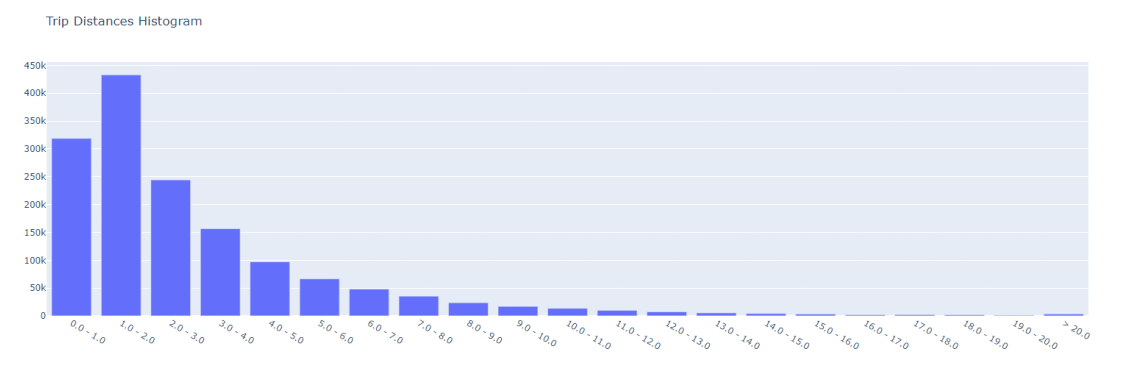

In [13]:
showImage('Histogram')

## Task 3
Report mean trip distance grouped by pick-up hour of day.

In [ ]:
# Doing it with pandas dataframes

# pickupTimes = df.select('lpep_pickup_datetime').rdd.flatMap(lambda x: x).collect()
# pickupTimes = pd.Series(pickupTimes)
# pd.to_datetime(pickupTimes).dt.hour

In [ ]:
# df.select("lpep_pickup_datetime").withColumn("hour", hour("lpep_pickup_datetime")).show()
# df.select("date").withColumn("dayofweek", dayofweek("date")))

In [ ]:
df = df.withColumn("hour", hour("lpep_pickup_datetime"))
df.limit(5).toPandas()

VendorID lpep_pickup_datetime Lpep_dropoff_datetime Store_and_fwd_flag  \
0         2  2015-09-01 00:02:34   2015-09-01 00:02:38                  N   
1         2  2015-09-01 00:04:20   2015-09-01 00:04:24                  N   
2         2  2015-09-01 00:01:50   2015-09-01 00:04:24                  N   
3         2  2015-09-01 00:02:36   2015-09-01 00:06:42                  N   
4         2  2015-09-01 00:00:14   2015-09-01 00:04:20                  N   

   RateCodeID  Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
0           5        -73.979485        40.684956         -73.979431   
1           5        -74.010796        40.912216         -74.010780   
2           1        -73.921410        40.766708         -73.914413   
3           1        -73.921387        40.766678         -73.931427   
4           1        -73.955482        40.714046         -73.944412   

   Dropoff_latitude  Passenger_count  ...  Extra  MTA_tax  Tip_amount  \
0         40.685020                1  ...    0.0      0.0        1.95   
1         40.912212                1  ...    0.0      0.0        0.00   
2         40.764687                1  ...    0.5      0.5        0.50   
3         40.771584                1  ...    0.5      0.5        0.00   
4         40.714729                1  ...    0.5      0.5        0.00   

   Tolls_amount  Ehail_fee  improvement_surcharge Total_amount  Payment_type  \
0           0.0       None                    0.0         9.75             1   
1           0.0       None                    0.0        45.00             1   
2           0.0       None                    0.3         5.80             1   
3           0.0       None                    0.3         6.30             2   
4           0.0       None                    0.3         6.30             2   

   Trip_type  hour  
0        2.0     0  
1        2.0     0  
2        1.0     0  
3        1.0     0  
4        1.0     0  

[5 rows x 22 columns]

In [ ]:
# df.filter(col('hour')==0).count()
df.groupBy('hour').count().orderBy('hour').show(25)

+----+-----+
|hour|count|
+----+-----+
|   0|67158|
|   1|53773|
|   2|41196|
|   3|31640|
|   4|26424|
|   5|16700|
|   6|22667|
|   7|41978|
|   8|58965|
|   9|62027|
|  10|57468|
|  11|56791|
|  12|57828|
|  13|57477|
|  14|66664|
|  15|73777|
|  16|79157|
|  17|88022|
|  18|97245|
|  19|96141|
|  20|90785|
|  21|86543|
|  22|84705|
|  23|79795|
+----+-----+



In [ ]:
df.groupBy("hour").mean("Trip_distance").orderBy('hour').show(25)

+----+------------------+
|hour|avg(Trip_distance)|
+----+------------------+
|   0|3.1152760653980307|
|   1|3.0173471816710973|
|   2| 3.046175599572765|
|   3|3.2129453223767297|
|   4| 3.526555025734179|
|   5| 4.133474251497001|
|   6| 4.055148894869178|
|   7|3.2843944447091373|
|   8|3.0484495887390897|
|   9|2.9991052283683004|
|  10|2.9444823205958253|
|  11|2.9120154601961805|
|  12|2.9030647783080705|
|  13|2.8782944482140733|
|  14| 2.864304272170884|
|  15|2.8570399989156567|
|  16|  2.77985156082216|
|  17| 2.679113857899139|
|  18| 2.653222067972637|
|  19| 2.715596883743693|
|  20|2.7770517155917873|
|  21|2.9991886114417046|
|  22|3.1853935422938324|
|  23| 3.191537940973751|
+----+------------------+



## Task 4

We’d like to get a rough sense of identifying trips that terminate at one of the NYC area airports.
Can you provide a count of how many transactions fit this criteria, the average fair, and any other
interesting characteristics of these trips.


https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

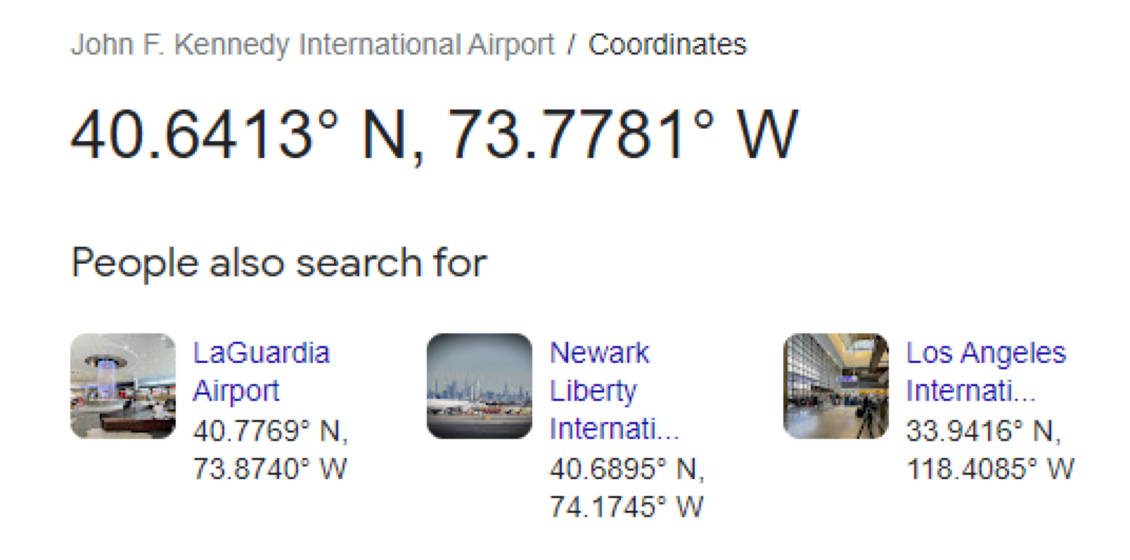

In [ ]:
showImage('Airport')

### Calculate the distance traveled
The <a href='https://en.wikipedia.org/wiki/Haversine_formula'>haversine formula</a> calculates the distance on a sphere between two sets of GPS coordinates.<br>
Here we assign latitude values with $\varphi$ (phi) and longitude with $\lambda$ (lambda).

The distance formula works out to

${\displaystyle d=2r\arcsin \left({\sqrt {\sin ^{2}\left({\frac {\varphi _{2}-\varphi _{1}}{2}}\right)+\cos(\varphi _{1})\:\cos(\varphi _{2})\:\sin ^{2}\left({\frac {\lambda _{2}-\lambda _{1}}{2}}\right)}}\right)}$

where

$\begin{split} r&: \textrm {radius of the sphere (Earth's radius averages 6371 km)}\\
\varphi_1, \varphi_2&: \textrm {latitudes of point 1 and point 2}\\
\lambda_1, \lambda_2&: \textrm {longitudes of point 1 and point 2}\end{split}$

In [ ]:
def haversine_distance(lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    
    JFK_longitude = -73.7781
    JFK_latitude = 40.6413

    lat1, long1 =  JFK_latitude, JFK_longitude


    r = 6371  # average radius of Earth in kilometers

    phi1 = np.radians(lat1)
    
    phi2 = np.radians(lat2)

    delta_phi = np.radians(lat2-lat1)
    delta_lambda = np.radians(long2-long1)

    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers
    d = float(d)

    return d

In [ ]:
# Create Index

# from pyspark.sql import Window
# temp.withColumn(
#     "index",
#     row_number().over(Window.orderBy(monotonically_increasing_id()))-1
# )

In [ ]:
temp = df.select(df.RateCodeID, df.Dropoff_longitude, df.Dropoff_latitude, df.Fare_amount, df.Total_amount)
# .filter(col('RateCodeID')==2)
temp.show()


+----------+------------------+------------------+-----------+------------+
|RateCodeID| Dropoff_longitude|  Dropoff_latitude|Fare_amount|Total_amount|
+----------+------------------+------------------+-----------+------------+
|         5|-73.97943115234375|40.685020446777344|        7.8|        9.75|
|         5|-74.01078033447266| 40.91221237182617|       45.0|        45.0|
|         1|-73.91441345214844|40.764686584472656|        4.0|         5.8|
|         1|-73.93142700195312|40.771583557128906|        5.0|         6.3|
|         1|-73.94441223144531| 40.71472930908203|        5.0|         6.3|
|         1|-73.93766784667969|40.821197509765625|        5.5|        8.16|
|         1|-73.87692260742188| 40.75630569458008|        6.5|         7.8|
|         1| -73.9376449584961| 40.80451583862305|        5.0|         6.3|
|         1|  -73.956787109375|  40.6805305480957|        6.0|        8.76|
|         1|-73.88862609863281|40.752723693847656|        5.5|         6.8|
|         1|

In [ ]:
udf_calculateDistance = udf(lambda x, y: haversine_distance(x, y), DoubleType())

In [ ]:
temp = temp.withColumn("DistanceToJFK",udf_calculateDistance(col("Dropoff_latitude"), col("Dropoff_longitude"))).select('RateCodeID','Dropoff_latitude', 'Dropoff_longitude', 'DistanceToJFK', 'Fare_amount','Total_amount')
temp.show()

+----------+------------------+------------------+------------------+-----------+------------+
|RateCodeID|  Dropoff_latitude| Dropoff_longitude|     DistanceToJFK|Fare_amount|Total_amount|
+----------+------------------+------------------+------------------+-----------+------------+
|         5|40.685020446777344|-73.97943115234375|17.663900258780924|        7.8|        9.75|
|         5| 40.91221237182617|-74.01078033447266| 35.93499047641628|       45.0|        45.0|
|         1|40.764686584472656|-73.91441345214844| 17.89624825272733|        4.0|         5.8|
|         1|40.771583557128906|-73.93142700195312| 19.41409930544363|        5.0|         6.3|
|         1| 40.71472930908203|-73.94441223144531|  16.2284719937374|        5.0|         6.3|
|         1|40.821197509765625|-73.93766784667969| 24.10238596147894|        5.5|        8.16|
|         1| 40.75630569458008|-73.87692260742188|15.262342354622332|        6.5|         7.8|
|         1| 40.80451583862305| -73.9376449584961|

In [ ]:
temp.filter(col('RateCodeID') == 2).count()

4435

In [ ]:
temp = temp.filter(col('DistanceToJFK') <= 2.0)
temp.count()

12948

In [ ]:
temp.filter(col('RateCodeID') == 2).count()

2354

In [ ]:
temp.select(mean('Fare_amount'), mean('Total_amount')).show()

+------------------+-----------------+
|  avg(Fare_amount)|avg(Total_amount)|
+------------------+-----------------+
|41.513083101637314|48.65495675007487|
+------------------+-----------------+



## Task 5
Do two clusterings on pick-up and drop-off locations respectively. Choose a proper number of clusters
k and report the centroids. Is there much difference between centroids for pick-up and drop-off? Note:
do not set the maximal k too large in your code. k from 2 to 10 - 20 should be enough to try.

In [16]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import StandardScaler

import folium
#  https://github.com/python-visualization/folium
#  https://stackoverflow.com/questions/39401729/plot-latitude-longitude-points-from-dataframe-on-folium-map-ipython
# https://spark.apache.org/docs/latest/ml-clustering.html

In [17]:
# New York City Longitude and Latitude

NY_latitude = 40.7127281 
NY_longitude = -74.0060152

### Pickup Clustering

In [ ]:
feature_columns = ['Pickup_longitude', 'Pickup_latitude']
feature_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

In [ ]:
df.select(df.Pickup_longitude, df.Pickup_latitude).count()

1494926

In [ ]:
temp = df.select(df.Pickup_longitude, df.Pickup_latitude).filter(col('Pickup_longitude') < -1).filter(col('Pickup_latitude') > 1)
temp.show()

+------------------+------------------+
|  Pickup_longitude|   Pickup_latitude|
+------------------+------------------+
|-73.97948455810547| 40.68495559692383|
|-74.01079559326172| 40.91221618652344|
| -73.9214096069336| 40.76670837402344|
|   -73.92138671875| 40.76667785644531|
|-73.95548248291016|40.714046478271484|
|-73.94529724121094| 40.80818557739258|
|-73.89087677001953| 40.74642562866211|
|-73.94670104980469| 40.79732131958008|
|-73.96315002441406| 40.69382858276367|
|-73.89682006835938| 40.74612808227539|
|-73.82991790771484|40.713768005371094|
| -73.9055404663086|40.772525787353516|
|  -73.941650390625|40.818294525146484|
|-73.93252563476562| 40.85680389404297|
|-73.95282745361328|40.808353424072266|
|  -73.904052734375| 40.87870788574219|
|-74.02134704589844|40.647010803222656|
|-73.95098876953125| 40.68049621582031|
|-73.84967041015625| 40.72400665283203|
| -73.9466781616211| 40.80628967285156|
+------------------+------------------+
only showing top 20 rows



In [ ]:
temp.count()

1492816

In [ ]:
temp = feature_assembler.transform(temp)
temp.show()

+------------------+------------------+--------------------+
|  Pickup_longitude|   Pickup_latitude|            features|
+------------------+------------------+--------------------+
|-73.97948455810547| 40.68495559692383|[-73.979484558105...|
|-74.01079559326172| 40.91221618652344|[-74.010795593261...|
| -73.9214096069336| 40.76670837402344|[-73.921409606933...|
|   -73.92138671875| 40.76667785644531|[-73.92138671875,...|
|-73.95548248291016|40.714046478271484|[-73.955482482910...|
|-73.94529724121094| 40.80818557739258|[-73.945297241210...|
|-73.89087677001953| 40.74642562866211|[-73.890876770019...|
|-73.94670104980469| 40.79732131958008|[-73.946701049804...|
|-73.96315002441406| 40.69382858276367|[-73.963150024414...|
|-73.89682006835938| 40.74612808227539|[-73.896820068359...|
|-73.82991790771484|40.713768005371094|[-73.829917907714...|
| -73.9055404663086|40.772525787353516|[-73.905540466308...|
|  -73.941650390625|40.818294525146484|[-73.941650390625...|
|-73.93252563476562| 40.

In [ ]:
# To Normalize the data
# scale=StandardScaler(inputCol='features',outputCol='standardized')

# data_scale=scale.fit(temp)
# data_scale_output=data_scale.transform(temp)
# data_scale_output.show()

In [ ]:
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')


In [ ]:
silhouette_score=[]
for i in range(2,9):
    
    KMeans_algo=KMeans(initMode='k-means||', featuresCol='features', k=i)
    
    KMeans_fit=KMeans_algo.fit(temp)  
    output=KMeans_fit.transform(temp)
    
    score=evaluator.evaluate(output)    
    silhouette_score.append(score)
    
    print("# of Cluster {} - Silhouette Score {}".format(i,score))

# of Cluster 2 - Silhouette Score 0.6611252282591302


# of Cluster 3 - Silhouette Score 0.7222589501320458


# of Cluster 4 - Silhouette Score 0.6512014242065557


# of Cluster 5 - Silhouette Score 0.6812901188261963


# of Cluster 6 - Silhouette Score 0.572138321591105


# of Cluster 7 - Silhouette Score 0.585649318449386


# of Cluster 8 - Silhouette Score 0.6385662022799282


Silhouette Method  
https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb#:~:text=The%20Silhouette%20Method,-The%20silhouette%20value&text=A%20high%20value%20is%20desirable,many%20or%20too%20few%20clusters.&text=Note%3A%20s(i)%20is,only%20point%20in%20the%20cluster.

Text(0, 0.5, 'Cost')

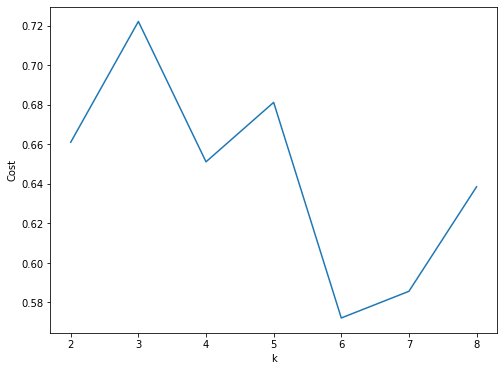

In [ ]:
#Visualizing the silhouette scores in a plot

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,9),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('Cost')

In [ ]:
K_ = 3

KMeans_algo=KMeans(initMode='k-means||', featuresCol='features', k=K_)
    
KMeans_fit=KMeans_algo.fit(temp)  
output=KMeans_fit.transform(temp)

In [ ]:
KMeans_fit.summary.clusterSizes

[586660, 585954, 320202]

In [ ]:
print("KMeans Cluster Centers: ")
for center in KMeans_fit.clusterCenters():
    print(center)

KMeans Cluster Centers: 
[-73.93712528  40.80841123]
[-73.966949    40.69311675]
[-73.87355798  40.74084974]


In [ ]:
output=KMeans_fit.transform(temp)
output.show()

+------------------+------------------+--------------------+----------+
|  Pickup_longitude|   Pickup_latitude|            features|prediction|
+------------------+------------------+--------------------+----------+
|-73.97948455810547| 40.68495559692383|[-73.979484558105...|         1|
|-74.01079559326172| 40.91221618652344|[-74.010795593261...|         0|
| -73.9214096069336| 40.76670837402344|[-73.921409606933...|         0|
|   -73.92138671875| 40.76667785644531|[-73.92138671875,...|         0|
|-73.95548248291016|40.714046478271484|[-73.955482482910...|         1|
|-73.94529724121094| 40.80818557739258|[-73.945297241210...|         0|
|-73.89087677001953| 40.74642562866211|[-73.890876770019...|         2|
|-73.94670104980469| 40.79732131958008|[-73.946701049804...|         0|
|-73.96315002441406| 40.69382858276367|[-73.963150024414...|         1|
|-73.89682006835938| 40.74612808227539|[-73.896820068359...|         2|
|-73.82991790771484|40.713768005371094|[-73.829917907714...|    

In [ ]:
pickupCentres = []
for c in KMeans_fit.clusterCenters():
  pickupCentres.append((c[1],c[0])) # Lat, Long
pickupCentres

[(40.808411234909656, -73.93712527644813),
 (40.693116747509, -73.9669489960851),
 (40.74084973986276, -73.87355798347313)]

In [ ]:
map_ny_pickup = folium.Map( location=[NY_latitude, NY_longitude], zoom_start=11)
for coord in pickupCentres:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( map_ny_pickup )

map_ny_pickup.save( dir + '/map_ny_pickup.html')

In [ ]:
map_ny_pickup

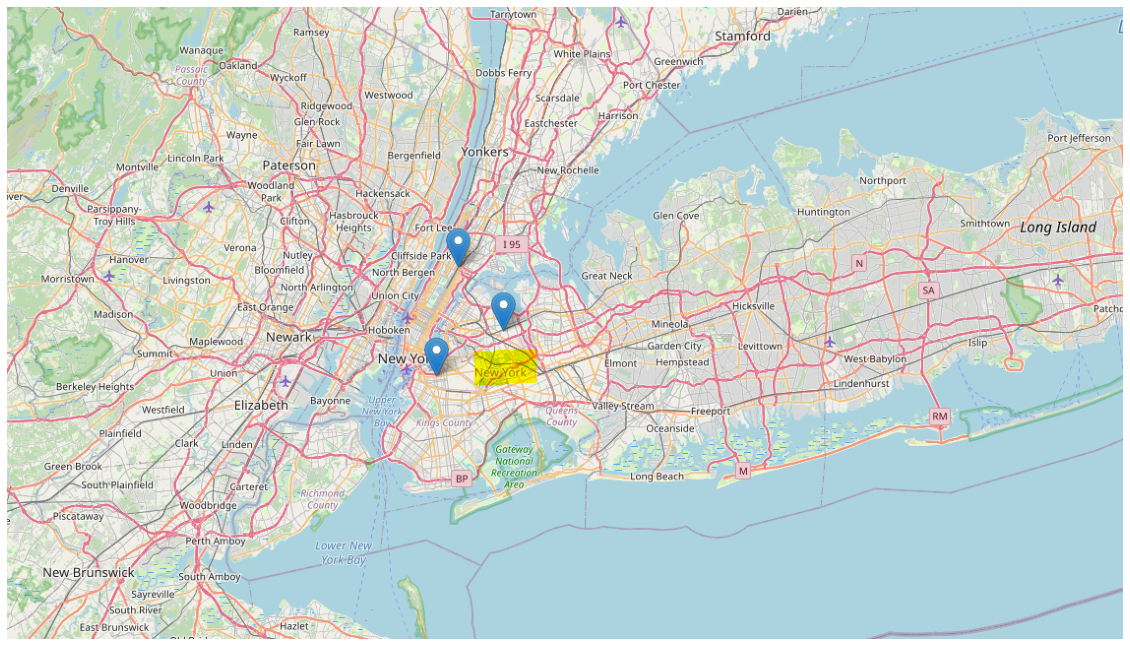

In [14]:
showImage('pickupCentres')

### Dropoff Clustering

In [18]:
feature_columns = ['Dropoff_latitude', 'Dropoff_longitude']
feature_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

In [19]:
temp = df.select(df.Dropoff_longitude, df.Dropoff_latitude).filter(col('Dropoff_longitude') < -1).filter(col('Dropoff_latitude') > 1)
temp.show()

+------------------+------------------+
| Dropoff_longitude|  Dropoff_latitude|
+------------------+------------------+
|-73.97943115234375|40.685020446777344|
|-74.01078033447266| 40.91221237182617|
|-73.91441345214844|40.764686584472656|
|-73.93142700195312|40.771583557128906|
|-73.94441223144531| 40.71472930908203|
|-73.93766784667969|40.821197509765625|
|-73.87692260742188| 40.75630569458008|
| -73.9376449584961| 40.80451583862305|
|  -73.956787109375|  40.6805305480957|
|-73.88862609863281|40.752723693847656|
|-73.83494567871094| 40.70729064941406|
| -73.8953628540039| 40.76896286010742|
|  -73.950927734375| 40.82603073120117|
|-73.93136596679688|40.856117248535156|
|-73.94914245605469| 40.80290985107422|
|-73.89696502685547| 40.90113067626953|
|-74.00405883789062| 40.65459442138672|
| -73.9539566040039| 40.69042205810547|
|-73.83512878417969| 40.70719909667969|
|-73.93624877929688|40.799251556396484|
+------------------+------------------+
only showing top 20 rows



In [20]:
temp.count()

1492963

In [21]:
temp = feature_assembler.transform(temp)
temp.show()

+------------------+------------------+--------------------+
| Dropoff_longitude|  Dropoff_latitude|            features|
+------------------+------------------+--------------------+
|-73.97943115234375|40.685020446777344|[40.6850204467773...|
|-74.01078033447266| 40.91221237182617|[40.9122123718261...|
|-73.91441345214844|40.764686584472656|[40.7646865844726...|
|-73.93142700195312|40.771583557128906|[40.7715835571289...|
|-73.94441223144531| 40.71472930908203|[40.7147293090820...|
|-73.93766784667969|40.821197509765625|[40.8211975097656...|
|-73.87692260742188| 40.75630569458008|[40.7563056945800...|
| -73.9376449584961| 40.80451583862305|[40.8045158386230...|
|  -73.956787109375|  40.6805305480957|[40.6805305480957...|
|-73.88862609863281|40.752723693847656|[40.7527236938476...|
|-73.83494567871094| 40.70729064941406|[40.7072906494140...|
| -73.8953628540039| 40.76896286010742|[40.7689628601074...|
|  -73.950927734375| 40.82603073120117|[40.8260307312011...|
|-73.93136596679688|40.8

In [22]:
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')

In [ ]:
silhouette_score=[]
for i in range(2,9):
    
    KMeans_algo=KMeans(initMode='k-means||', featuresCol='features', k=i)
    
    KMeans_fit=KMeans_algo.fit(temp)  
    output=KMeans_fit.transform(temp)
    
    score=evaluator.evaluate(output)    
    silhouette_score.append(score)
    
    print("# of Cluster {} - Silhouette Score {}".format(i,score))

# of Cluster 2 - Silhouette Score 0.5525873885716764
# of Cluster 3 - Silhouette Score 0.6386966773785092
# of Cluster 4 - Silhouette Score 0.5331446666324291
# of Cluster 5 - Silhouette Score 0.4591331920428451
# of Cluster 6 - Silhouette Score 0.566816725594245
# of Cluster 7 - Silhouette Score 0.5386418310016075
# of Cluster 8 - Silhouette Score 0.466579364902224


Text(0, 0.5, 'Cost')

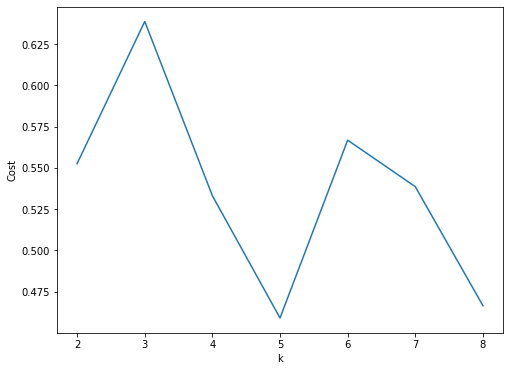

In [ ]:
#Visualizing the silhouette scores in a plot

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,9),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('Cost')

In [23]:
K_ = 3

KMeans_algo=KMeans(initMode='k-means||', featuresCol='features', k=K_)
    
KMeans_fit=KMeans_algo.fit(temp)  
output=KMeans_fit.transform(temp)

In [24]:
KMeans_fit.summary.clusterSizes

[294273, 611710, 586980]

In [25]:
print("KMeans Cluster Centers: ")
for center in KMeans_fit.clusterCenters():
    print(center)

KMeans Cluster Centers: 
[ 40.73422424 -73.85634645]
[ 40.80088071 -73.93916513]
[ 40.69569456 -73.96846485]


In [26]:
output=KMeans_fit.transform(temp)
output.show()

+------------------+------------------+--------------------+----------+
| Dropoff_longitude|  Dropoff_latitude|            features|prediction|
+------------------+------------------+--------------------+----------+
|-73.97943115234375|40.685020446777344|[40.6850204467773...|         2|
|-74.01078033447266| 40.91221237182617|[40.9122123718261...|         1|
|-73.91441345214844|40.764686584472656|[40.7646865844726...|         1|
|-73.93142700195312|40.771583557128906|[40.7715835571289...|         1|
|-73.94441223144531| 40.71472930908203|[40.7147293090820...|         2|
|-73.93766784667969|40.821197509765625|[40.8211975097656...|         1|
|-73.87692260742188| 40.75630569458008|[40.7563056945800...|         0|
| -73.9376449584961| 40.80451583862305|[40.8045158386230...|         1|
|  -73.956787109375|  40.6805305480957|[40.6805305480957...|         2|
|-73.88862609863281|40.752723693847656|[40.7527236938476...|         0|
|-73.83494567871094| 40.70729064941406|[40.7072906494140...|    

In [29]:
dropoffCentres = []
for c in KMeans_fit.clusterCenters():
  dropoffCentres.append((c[0],c[1])) # Lat, Long
dropoffCentres

[(40.73422424294101, -73.85634644862887),
 (40.80088071282336, -73.9391651329941),
 (40.69569455670109, -73.96846484820331)]

In [30]:
map_ny_dropoff = folium.Map( location=[NY_latitude, NY_longitude], zoom_start=11)
for coord in dropoffCentres:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( map_ny_dropoff )

map_ny_dropoff.save( dir + '/map_ny_dropoff.html')
map_ny_dropoff

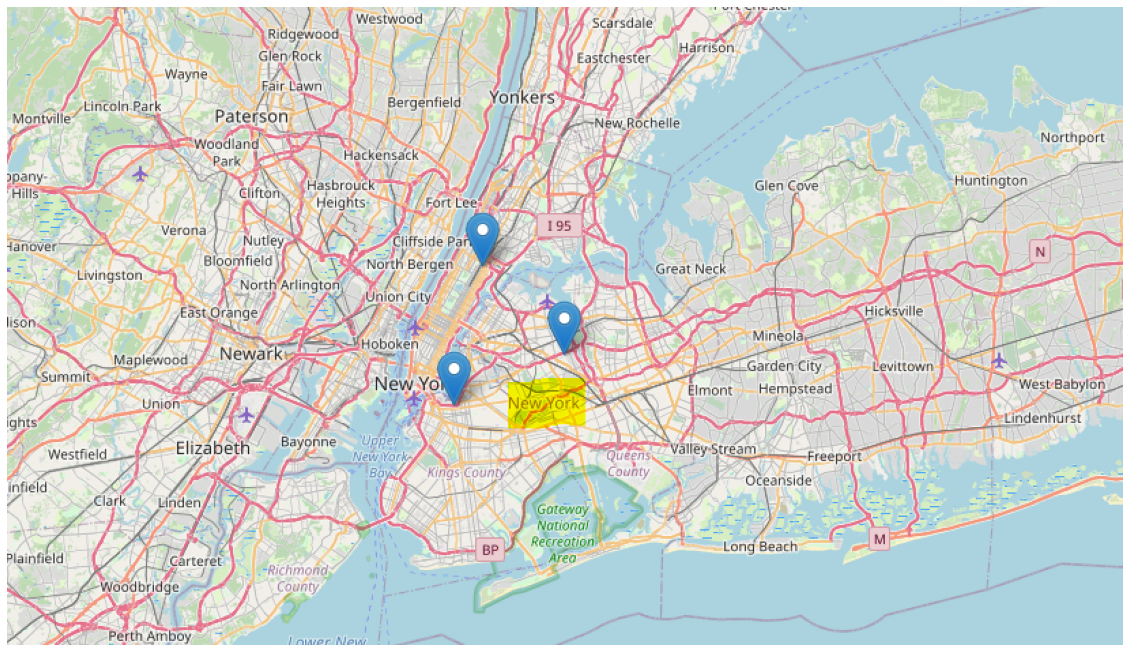

In [15]:
showImage('DropoffCenters')

## Task 6
Cluster pick-up and drop-off locations. Choose a proper number of clusters k and report the centroids
(you can use google maps to show centroids). What is the percentage of trips for each cluster? What
is percentage of trips where pick-up and drop-off are in the same cluster? What have you learnt from
this?


In [ ]:
from pyspark.sql import Window

In [ ]:
def rename_columns(df, columns):
    if isinstance(columns, dict):
        return df.select(*[col(col_name).alias(columns.get(col_name, col_name)) for col_name in df.columns])
    else:
        raise ValueError("'columns' should be a dict, like {'old_name_1':'new_name_1', 'old_name_2':'new_name_2'}")

In [ ]:
filteredDF = df.select(df.Pickup_longitude, df.Pickup_latitude, df.Dropoff_longitude, df.Dropoff_latitude).filter(col('Dropoff_longitude') < -1).filter(col('Dropoff_latitude') > 1).filter(col('Pickup_longitude') < -1).filter(col('Pickup_latitude') > 1)
filteredDF.show()

+------------------+------------------+------------------+------------------+
|  Pickup_longitude|   Pickup_latitude| Dropoff_longitude|  Dropoff_latitude|
+------------------+------------------+------------------+------------------+
|-73.97948455810547| 40.68495559692383|-73.97943115234375|40.685020446777344|
|-74.01079559326172| 40.91221618652344|-74.01078033447266| 40.91221237182617|
| -73.9214096069336| 40.76670837402344|-73.91441345214844|40.764686584472656|
|   -73.92138671875| 40.76667785644531|-73.93142700195312|40.771583557128906|
|-73.95548248291016|40.714046478271484|-73.94441223144531| 40.71472930908203|
|-73.94529724121094| 40.80818557739258|-73.93766784667969|40.821197509765625|
|-73.89087677001953| 40.74642562866211|-73.87692260742188| 40.75630569458008|
|-73.94670104980469| 40.79732131958008| -73.9376449584961| 40.80451583862305|
|-73.96315002441406| 40.69382858276367|  -73.956787109375|  40.6805305480957|
|-73.89682006835938| 40.74612808227539|-73.88862609863281|40.752

In [ ]:
filteredDF = filteredDF.withColumn("trip", row_number().over(Window.orderBy(monotonically_increasing_id()))-1)
filteredDF.show()

+------------------+------------------+------------------+------------------+----+
|  Pickup_longitude|   Pickup_latitude| Dropoff_longitude|  Dropoff_latitude|trip|
+------------------+------------------+------------------+------------------+----+
|-73.97948455810547| 40.68495559692383|-73.97943115234375|40.685020446777344|   0|
|-74.01079559326172| 40.91221618652344|-74.01078033447266| 40.91221237182617|   1|
| -73.9214096069336| 40.76670837402344|-73.91441345214844|40.764686584472656|   2|
|   -73.92138671875| 40.76667785644531|-73.93142700195312|40.771583557128906|   3|
|-73.95548248291016|40.714046478271484|-73.94441223144531| 40.71472930908203|   4|
|-73.94529724121094| 40.80818557739258|-73.93766784667969|40.821197509765625|   5|
|-73.89087677001953| 40.74642562866211|-73.87692260742188| 40.75630569458008|   6|
|-73.94670104980469| 40.79732131958008| -73.9376449584961| 40.80451583862305|   7|
|-73.96315002441406| 40.69382858276367|  -73.956787109375|  40.6805305480957|   8|
|-73

In [ ]:
filteredDF.count()

1491377

In [ ]:
# Change Name
# dropoffDF = dropoffDF.withColumnRenamed("Dropoff_longitude ", "Dropoff_longitude")
dropoffDF = filteredDF.select(filteredDF.Dropoff_longitude, filteredDF.Dropoff_latitude, filteredDF.trip)
dropoffDF = dropoffDF.transform(lambda df: rename_columns(df, {'Dropoff_longitude':'longitude', 'Dropoff_latitude':'latitude'}))
dropoffDF = dropoffDF.withColumn("drop-pick", lit(1))
dropoffDF.show()

+------------------+------------------+----+---------+
|         longitude|          latitude|trip|drop-pick|
+------------------+------------------+----+---------+
|-73.97943115234375|40.685020446777344|   0|        1|
|-74.01078033447266| 40.91221237182617|   1|        1|
|-73.91441345214844|40.764686584472656|   2|        1|
|-73.93142700195312|40.771583557128906|   3|        1|
|-73.94441223144531| 40.71472930908203|   4|        1|
|-73.93766784667969|40.821197509765625|   5|        1|
|-73.87692260742188| 40.75630569458008|   6|        1|
| -73.9376449584961| 40.80451583862305|   7|        1|
|  -73.956787109375|  40.6805305480957|   8|        1|
|-73.88862609863281|40.752723693847656|   9|        1|
|-73.83494567871094| 40.70729064941406|  10|        1|
| -73.8953628540039| 40.76896286010742|  11|        1|
|  -73.950927734375| 40.82603073120117|  12|        1|
|-73.93136596679688|40.856117248535156|  13|        1|
|-73.94914245605469| 40.80290985107422|  14|        1|
|-73.89696

In [ ]:
dropoffDF.count()

1491377

In [ ]:
pickupDF = filteredDF.select(filteredDF.Pickup_longitude, filteredDF.Pickup_latitude, filteredDF.trip)
pickupDF = pickupDF.transform(lambda df: rename_columns(df, {'Pickup_longitude':'longitude', 'Pickup_latitude':'latitude'}))
pickupDF = pickupDF.withColumn("drop-pick", lit(0))
pickupDF.show()

+------------------+------------------+----+---------+
|         longitude|          latitude|trip|drop-pick|
+------------------+------------------+----+---------+
|-73.97948455810547| 40.68495559692383|   0|        0|
|-74.01079559326172| 40.91221618652344|   1|        0|
| -73.9214096069336| 40.76670837402344|   2|        0|
|   -73.92138671875| 40.76667785644531|   3|        0|
|-73.95548248291016|40.714046478271484|   4|        0|
|-73.94529724121094| 40.80818557739258|   5|        0|
|-73.89087677001953| 40.74642562866211|   6|        0|
|-73.94670104980469| 40.79732131958008|   7|        0|
|-73.96315002441406| 40.69382858276367|   8|        0|
|-73.89682006835938| 40.74612808227539|   9|        0|
|-73.82991790771484|40.713768005371094|  10|        0|
| -73.9055404663086|40.772525787353516|  11|        0|
|  -73.941650390625|40.818294525146484|  12|        0|
|-73.93252563476562| 40.85680389404297|  13|        0|
|-73.95282745361328|40.808353424072266|  14|        0|
|  -73.904

In [ ]:
pickupDF.count()

1491377

In [ ]:
1491377 + 1491377

2982754

In [ ]:
resultDF = pickupDF.union(dropoffDF)
resultDF.count()

2982754

### Clustering Concatenation of both

In [ ]:
feature_columns = ['longitude', 'latitude']
feature_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

In [ ]:
temp = feature_assembler.transform(resultDF)
temp.show()

+------------------+------------------+----+---------+--------------------+
|         longitude|          latitude|trip|drop-pick|            features|
+------------------+------------------+----+---------+--------------------+
|-73.97948455810547| 40.68495559692383|   0|        0|[-73.979484558105...|
|-74.01079559326172| 40.91221618652344|   1|        0|[-74.010795593261...|
| -73.9214096069336| 40.76670837402344|   2|        0|[-73.921409606933...|
|   -73.92138671875| 40.76667785644531|   3|        0|[-73.92138671875,...|
|-73.95548248291016|40.714046478271484|   4|        0|[-73.955482482910...|
|-73.94529724121094| 40.80818557739258|   5|        0|[-73.945297241210...|
|-73.89087677001953| 40.74642562866211|   6|        0|[-73.890876770019...|
|-73.94670104980469| 40.79732131958008|   7|        0|[-73.946701049804...|
|-73.96315002441406| 40.69382858276367|   8|        0|[-73.963150024414...|
|-73.89682006835938| 40.74612808227539|   9|        0|[-73.896820068359...|
|-73.8299179

In [ ]:
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')

In [ ]:
silhouette_score=[]
for i in range(2,9):
    
    KMeans_algo=KMeans(initMode='k-means||', featuresCol='features', k=i)
    
    KMeans_fit=KMeans_algo.fit(temp)  
    output=KMeans_fit.transform(temp)
    
    score=evaluator.evaluate(output)    
    silhouette_score.append(score)
    
    print("# of Cluster {} - Silhouette Score {}".format(i,score))

# of Cluster 2 - Silhouette Score 0.6049078535163831
# of Cluster 3 - Silhouette Score 0.6921117387245748
# of Cluster 4 - Silhouette Score 0.5422552623007995
# of Cluster 5 - Silhouette Score 0.622293264440046
# of Cluster 6 - Silhouette Score 0.5541757936048215
# of Cluster 7 - Silhouette Score 0.5728798104456425
# of Cluster 8 - Silhouette Score 0.4918210715599565


Text(0, 0.5, 'Cost')

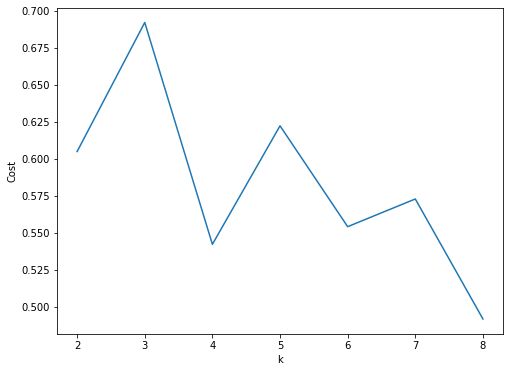

In [ ]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,9),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('Cost')

In [ ]:
K_ = 3

KMeans_algo=KMeans(initMode='k-means||', featuresCol='features', k=K_)
    
KMeans_fit=KMeans_algo.fit(temp)  
output=KMeans_fit.transform(temp)

In [ ]:
KMeans_fit.summary.clusterSizes

[1169668, 584750, 1228336]

In [ ]:
print("KMeans Cluster Centers: ")
for center in KMeans_fit.clusterCenters():
    print(center)

KMeans Cluster Centers: 
[-73.96791234  40.69440503]
[-73.86269197  40.73616492]
[-73.93755649  40.80349395]


In [ ]:
output=KMeans_fit.transform(temp)
output.show()

+------------------+------------------+----+---------+--------------------+----------+
|         longitude|          latitude|trip|drop-pick|            features|prediction|
+------------------+------------------+----+---------+--------------------+----------+
|-73.97948455810547| 40.68495559692383|   0|        0|[-73.979484558105...|         0|
|-74.01079559326172| 40.91221618652344|   1|        0|[-74.010795593261...|         2|
| -73.9214096069336| 40.76670837402344|   2|        0|[-73.921409606933...|         2|
|   -73.92138671875| 40.76667785644531|   3|        0|[-73.92138671875,...|         2|
|-73.95548248291016|40.714046478271484|   4|        0|[-73.955482482910...|         0|
|-73.94529724121094| 40.80818557739258|   5|        0|[-73.945297241210...|         2|
|-73.89087677001953| 40.74642562866211|   6|        0|[-73.890876770019...|         1|
|-73.94670104980469| 40.79732131958008|   7|        0|[-73.946701049804...|         2|
|-73.96315002441406| 40.69382858276367|   8

In [ ]:
allCentres = []
for c in KMeans_fit.clusterCenters():
  allCentres.append((c[1],c[0])) # Lat, Long
allCentres

[(40.694405031204674, -73.96791234346135),
 (40.73616492426392, -73.86269197153348),
 (40.80349394558888, -73.93755649226267)]

In [ ]:
map_ny_both = folium.Map( location=[NY_latitude, NY_longitude], zoom_start=11)
for coord in dropoffCentres:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( map_ny_both )

map_ny_both

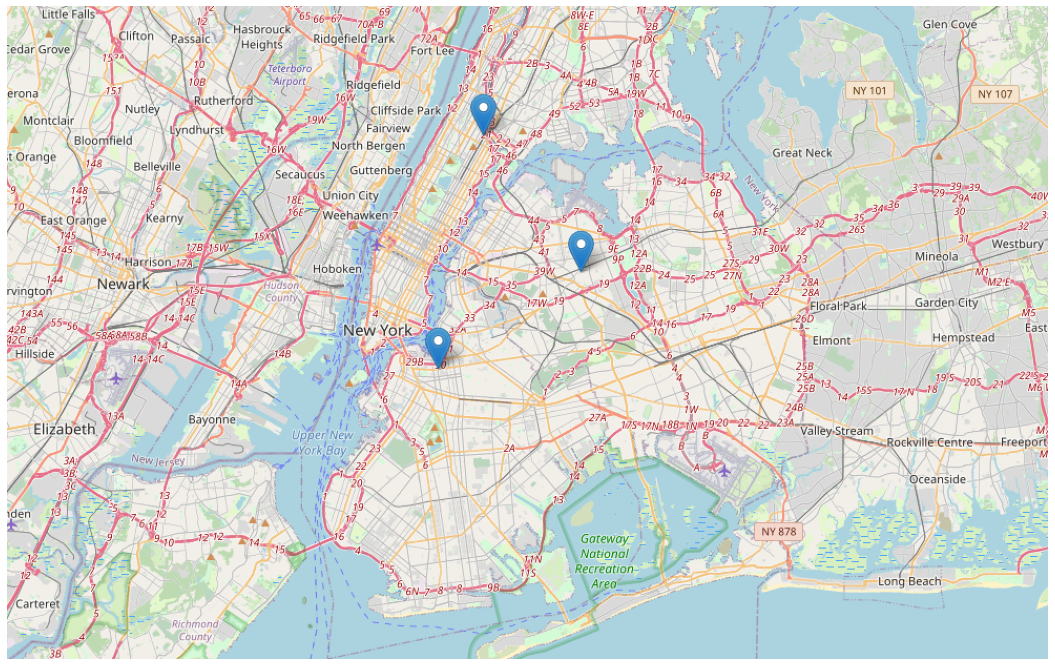

In [16]:
showImage('majorCenters')

In [ ]:
map_ny_both.save( dir + '/map_ny_both.html')

In [ ]:
output.count()

2982754

In [ ]:
# Percentage of trips for each clsuter
output.groupBy("prediction").count().orderBy('prediction').show()

+----------+-------+
|prediction|  count|
+----------+-------+
|         0|1169668|
|         1| 584750|
|         2|1228336|
+----------+-------+



In [ ]:
output.groupBy("prediction").count().orderBy('prediction').withColumn('percentage',col('count')/sum('count').over(Window.partitionBy())*100).show()

+----------+-------+------------------+
|prediction|  count|        percentage|
+----------+-------+------------------+
|         0|1169668|39.214363638436154|
|         1| 584750| 19.60436562988433|
|         2|1228336| 41.18127073167951|
+----------+-------+------------------+



In [ ]:
# All Pickup trip percentage from a cluster
output.filter(col('drop-pick') == 0).groupBy("prediction").count().orderBy('prediction').show()

+----------+------+
|prediction| count|
+----------+------+
|         0|581872|
|         1|277694|
|         2|631811|
+----------+------+



In [ ]:
output.filter(col('drop-pick') == 0).groupBy("prediction").count().orderBy('prediction').withColumn('percentage',col('count')/sum('count').over(Window.partitionBy())*100).show()

+----------+------+------------------+
|prediction| count|        percentage|
+----------+------+------------------+
|         0|581872|39.015755238279795|
|         1|277694|18.619973353484735|
|         2|631811|42.364271408235474|
+----------+------+------------------+



In [ ]:
# All Dropoff trip percentage from a cluster
output.filter(col('drop-pick') == 1).groupBy("prediction").count().orderBy('prediction').show()

+----------+------+
|prediction| count|
+----------+------+
|         0|587796|
|         1|307056|
|         2|596525|
+----------+------+



In [ ]:
output.filter(col('drop-pick') == 1).groupBy("prediction").count().orderBy('prediction').withColumn('percentage',col('count')/sum('count').over(Window.partitionBy())*100).show()

+----------+------+------------------+
|prediction| count|        percentage|
+----------+------+------------------+
|         0|587796| 39.41297203859252|
|         1|307056|20.588757906283924|
|         2|596525|39.998270055123555|
+----------+------+------------------+



In [ ]:
temp = output.select(output.trip, output.prediction)
temp.show()

+----+----------+
|trip|prediction|
+----+----------+
|   0|         0|
|   1|         2|
|   2|         2|
|   3|         2|
|   4|         0|
|   5|         2|
|   6|         1|
|   7|         2|
|   8|         0|
|   9|         1|
|  10|         1|
|  11|         2|
|  12|         2|
|  13|         2|
|  14|         2|
|  15|         2|
|  16|         0|
|  17|         0|
|  18|         1|
|  19|         2|
+----+----------+
only showing top 20 rows



In [ ]:
distinct_ele = temp.distinct().count()
duplicate_ele = temp.count() - distinct_ele
total_trips = temp.count()/2

print(distinct_ele, duplicate_ele, total_trips)

1706913 1275841 1491377.0


In [ ]:
print('Pickup and dropoff in same cluster percentage: {}%'.format((duplicate_ele/total_trips)*100))

Pickup and dropoff in same cluster percentage: 85.54785275621121%


## Task 7
Figure 2 is a visualization for a small number of trips. It gives us a rough sense where the trips happen.
Since the Hudson River, which is the boundary of New Jersey and NYC in this area, is quite straight,
we can use a line to model this natural boundary. The approximated line in latitude (y) and longitude
(x) can be represented as:  



y = 1.323942 ∗ x + 138.669195



If a location satisfies y > 1.323942x + 138.669195, it’s in New Jersey. If a location satisfies y <
1.323942x + 138.669195, it’s in Manhattan. After such processing, we can get Figure 2. In this way,
we can better utilize the pick-up and drop-off latitude-longitude data.



In this task, you are expected to group all trips into the following four categories, NJ → NJ, NJ
→ NYC, NYC → NJ, NYC → NYC. Can you build some association rules on intra- vs. inter-borough
traffic? What story does it tell about how New Yorkers use their green taxis? For example, in which
hour of the day, there would be more inter-borough traffic than intra-borough traffic? For those NYC
→ NYC trips, people are more likely to take taxis from uptown to downtown or from downtown to
uptown? There are many interesting stories in the data, feel free to discover some. Again, you can
create new features as needed.


In [12]:
amDF = df.select(df.lpep_pickup_datetime, df.Pickup_longitude, df.Pickup_latitude, df.Dropoff_longitude, df.Dropoff_latitude).filter(col('Dropoff_longitude') < -1).filter(col('Dropoff_latitude') > 1).filter(col('Pickup_longitude') < -1).filter(col('Pickup_latitude') > 1)
amDF.show()

+--------------------+------------------+------------------+------------------+------------------+
|lpep_pickup_datetime|  Pickup_longitude|   Pickup_latitude| Dropoff_longitude|  Dropoff_latitude|
+--------------------+------------------+------------------+------------------+------------------+
| 2015-09-01 00:02:34|-73.97948455810547| 40.68495559692383|-73.97943115234375|40.685020446777344|
| 2015-09-01 00:04:20|-74.01079559326172| 40.91221618652344|-74.01078033447266| 40.91221237182617|
| 2015-09-01 00:01:50| -73.9214096069336| 40.76670837402344|-73.91441345214844|40.764686584472656|
| 2015-09-01 00:02:36|   -73.92138671875| 40.76667785644531|-73.93142700195312|40.771583557128906|
| 2015-09-01 00:00:14|-73.95548248291016|40.714046478271484|-73.94441223144531| 40.71472930908203|
| 2015-09-01 00:00:39|-73.94529724121094| 40.80818557739258|-73.93766784667969|40.821197509765625|
| 2015-09-01 00:00:52|-73.89087677001953| 40.74642562866211|-73.87692260742188| 40.75630569458008|
| 2015-09-

In [13]:
amDF = amDF.withColumn("dayofmonth", dayofmonth("lpep_pickup_datetime")).withColumn("hour", hour("lpep_pickup_datetime"))
amDF.show()

+--------------------+------------------+------------------+------------------+------------------+----------+----+
|lpep_pickup_datetime|  Pickup_longitude|   Pickup_latitude| Dropoff_longitude|  Dropoff_latitude|dayofmonth|hour|
+--------------------+------------------+------------------+------------------+------------------+----------+----+
| 2015-09-01 00:02:34|-73.97948455810547| 40.68495559692383|-73.97943115234375|40.685020446777344|         1|   0|
| 2015-09-01 00:04:20|-74.01079559326172| 40.91221618652344|-74.01078033447266| 40.91221237182617|         1|   0|
| 2015-09-01 00:01:50| -73.9214096069336| 40.76670837402344|-73.91441345214844|40.764686584472656|         1|   0|
| 2015-09-01 00:02:36|   -73.92138671875| 40.76667785644531|-73.93142700195312|40.771583557128906|         1|   0|
| 2015-09-01 00:00:14|-73.95548248291016|40.714046478271484|-73.94441223144531| 40.71472930908203|         1|   0|
| 2015-09-01 00:00:39|-73.94529724121094| 40.80818557739258|-73.93766784667969|4

In [14]:
def getArea(lat, long):
  # y latitude, x longitude
  x = long
  y = (1.323942*x) + 138.669195
  if lat > y:
    return 'NJ'
  else:
    return 'NYC'


In [15]:
udf_calculateArea = udf(lambda x, y: getArea(x, y), StringType())
temp = amDF.withColumn("Origin",udf_calculateArea(col("Pickup_latitude"), col("Pickup_longitude"))).select('lpep_pickup_datetime','Pickup_longitude', 'Pickup_latitude','Dropoff_latitude', 'Dropoff_longitude', 'dayofmonth', 'hour', 'Origin')
temp.show()

+--------------------+------------------+------------------+------------------+------------------+----------+----+------+
|lpep_pickup_datetime|  Pickup_longitude|   Pickup_latitude|  Dropoff_latitude| Dropoff_longitude|dayofmonth|hour|Origin|
+--------------------+------------------+------------------+------------------+------------------+----------+----+------+
| 2015-09-01 00:02:34|-73.97948455810547| 40.68495559692383|40.685020446777344|-73.97943115234375|         1|   0|   NYC|
| 2015-09-01 00:04:20|-74.01079559326172| 40.91221618652344| 40.91221237182617|-74.01078033447266|         1|   0|    NJ|
| 2015-09-01 00:01:50| -73.9214096069336| 40.76670837402344|40.764686584472656|-73.91441345214844|         1|   0|   NYC|
| 2015-09-01 00:02:36|   -73.92138671875| 40.76667785644531|40.771583557128906|-73.93142700195312|         1|   0|   NYC|
| 2015-09-01 00:00:14|-73.95548248291016|40.714046478271484| 40.71472930908203|-73.94441223144531|         1|   0|   NYC|
| 2015-09-01 00:00:39|-7

In [16]:
temp = temp.withColumn("Destination",udf_calculateArea(col("Dropoff_latitude"), col("Dropoff_longitude"))).select('lpep_pickup_datetime','Pickup_longitude', 'Pickup_latitude','Dropoff_latitude', 'Dropoff_longitude', 'dayofmonth', 'hour', 'Origin', 'Destination')
temp.show()

+--------------------+------------------+------------------+------------------+------------------+----------+----+------+-----------+
|lpep_pickup_datetime|  Pickup_longitude|   Pickup_latitude|  Dropoff_latitude| Dropoff_longitude|dayofmonth|hour|Origin|Destination|
+--------------------+------------------+------------------+------------------+------------------+----------+----+------+-----------+
| 2015-09-01 00:02:34|-73.97948455810547| 40.68495559692383|40.685020446777344|-73.97943115234375|         1|   0|   NYC|        NYC|
| 2015-09-01 00:04:20|-74.01079559326172| 40.91221618652344| 40.91221237182617|-74.01078033447266|         1|   0|    NJ|         NJ|
| 2015-09-01 00:01:50| -73.9214096069336| 40.76670837402344|40.764686584472656|-73.91441345214844|         1|   0|   NYC|        NYC|
| 2015-09-01 00:02:36|   -73.92138671875| 40.76667785644531|40.771583557128906|-73.93142700195312|         1|   0|   NYC|        NYC|
| 2015-09-01 00:00:14|-73.95548248291016|40.714046478271484| 4

In [17]:
# NYC -> NYC  Support(NYC,NYC)/Support(NYC)
(temp.filter(col('Origin') == 'NYC').filter(col('Destination') == 'NYC').count()/temp.filter(col('Origin') == 'NYC').count())*100

85.73340731945497

In [18]:
# NYC -> NJ  Support(NYC,NJ)/Support(NYC)
(temp.filter(col('Origin') == 'NYC').filter(col('Destination') == 'NJ').count()/temp.filter(col('Origin') == 'NYC').count())*100

14.266592680545031

In [19]:
# NJ -> NJ  Support(NJ,NJ)/Support(NJ)
(temp.filter(col('Origin') == 'NJ').filter(col('Destination') == 'NJ').count()/temp.filter(col('Origin') == 'NJ').count())*100

92.45486153282432

In [20]:
# NJ -> NYC  Support(NJ,NYC)/Support(NJ)
(temp.filter(col('Origin') == 'NJ').filter(col('Destination') == 'NYC').count()/temp.filter(col('Origin') == 'NJ').count())*100

7.545138467175673

In [21]:
def getBorough(A, B):
  if A == B:
    return 'Intra-borough'
  else:
    return 'Inter-borough'

In [22]:
udf_findBorough = udf(lambda x, y: getBorough(x, y), StringType())

In [23]:
temp = temp.withColumn("Borough",udf_findBorough(col('Origin'), col('Destination'))).select('lpep_pickup_datetime','Pickup_longitude', 'Pickup_latitude','Dropoff_latitude', 'Dropoff_longitude', 'dayofmonth', 'hour', 'Origin', 'Destination', 'Borough')
temp.show()

+--------------------+------------------+------------------+------------------+------------------+----------+----+------+-----------+-------------+
|lpep_pickup_datetime|  Pickup_longitude|   Pickup_latitude|  Dropoff_latitude| Dropoff_longitude|dayofmonth|hour|Origin|Destination|      Borough|
+--------------------+------------------+------------------+------------------+------------------+----------+----+------+-----------+-------------+
| 2015-09-01 00:02:34|-73.97948455810547| 40.68495559692383|40.685020446777344|-73.97943115234375|         1|   0|   NYC|        NYC|Intra-borough|
| 2015-09-01 00:04:20|-74.01079559326172| 40.91221618652344| 40.91221237182617|-74.01078033447266|         1|   0|    NJ|         NJ|Intra-borough|
| 2015-09-01 00:01:50| -73.9214096069336| 40.76670837402344|40.764686584472656|-73.91441345214844|         1|   0|   NYC|        NYC|Intra-borough|
| 2015-09-01 00:02:36|   -73.92138671875| 40.76667785644531|40.771583557128906|-73.93142700195312|         1|   

In [25]:
temp.groupBy('hour', 'Borough').count().orderBy('hour').show(50)

+----+-------------+-----+
|hour|      Borough|count|
+----+-------------+-----+
|   0|Inter-borough| 8217|
|   0|Intra-borough|58789|
|   1|Intra-borough|47188|
|   1|Inter-borough| 6474|
|   2|Inter-borough| 4870|
|   2|Intra-borough|36235|
|   3|Intra-borough|27642|
|   3|Inter-borough| 3922|
|   4|Intra-borough|22821|
|   4|Inter-borough| 3529|
|   5|Inter-borough| 3151|
|   5|Intra-borough|13488|
|   6|Inter-borough| 4755|
|   6|Intra-borough|17846|
|   7|Inter-borough| 7419|
|   7|Intra-borough|34454|
|   8|Intra-borough|48678|
|   8|Inter-borough|10123|
|   9|Intra-borough|51709|
|   9|Inter-borough|10156|
|  10|Inter-borough| 8031|
|  10|Intra-borough|49272|
|  11|Intra-borough|49460|
|  11|Inter-borough| 7157|
|  12|Intra-borough|50818|
|  12|Inter-borough| 6831|
|  13|Intra-borough|51041|
|  13|Inter-borough| 6265|
|  14|Inter-borough| 6922|
|  14|Intra-borough|59551|
|  15|Intra-borough|66210|
|  15|Inter-borough| 7377|
|  16|Inter-borough| 7392|
|  16|Intra-borough|71561|
|

## Task 8

Could you suggest to Green Taxi how to improve their business? Think about ways they could decrease
cost, get more customers, improve quality of service etc.
In all tasks, try to use the algorithms that you learnt in class, if you didn’t succeed, you can come up
with other tasks yourself using this data set.

**Answer provided in the Project Report**

## The End